<a href="https://colab.research.google.com/github/davifebdn/SkLearn_Train_Test/blob/main/Tasca_M5_T02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tasca M5 T02
Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston.

##Exercici 1

Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

També adjunt trobaràs una descripció de les diferents variables del dataset.

In [4]:
#Importació
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#Càrrega de les dades
housing = pd.read_csv("/content/drive/MyDrive/IT Academy/Data Science/Sprint 5. Introducció al Test d'Hipòtesis i al Machine Learning/M5T02/housing data.csv", sep=',',encoding="ISO-8859-1")
housing.head()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


Descarreguem l'arxiu `housing data description.txt` per veure en què consisteix el dataset i l'enganxem a continuació:

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.

Com que al carregar el dataframe, aquest no té *headers*, les afegeixo amb les dades que hi ha a la descripció del txt:

In [3]:
housing.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B1000", "LSTAT", "MEDV"]
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B1000,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


Abans de fer la divisió, hem de divir el dataset en *Features* i *Target*. En aquest dataset el *Target* será la columna `MEDV`, és a dir, el preu mitjà de les propietats ocupades per propietaris.

In [11]:
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B1000", "LSTAT"]
X = housing.loc[:, features]
y = housing.loc[:, ['MEDV']]

Llavors, hem de fer la divisió del dataset entre en dos sets: Training i Data (train test split). Fem una divisió de 80% pel train i 20% pel test.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

Ara podem fer l'estudi de cada conjunt. Comencem pel X_train:

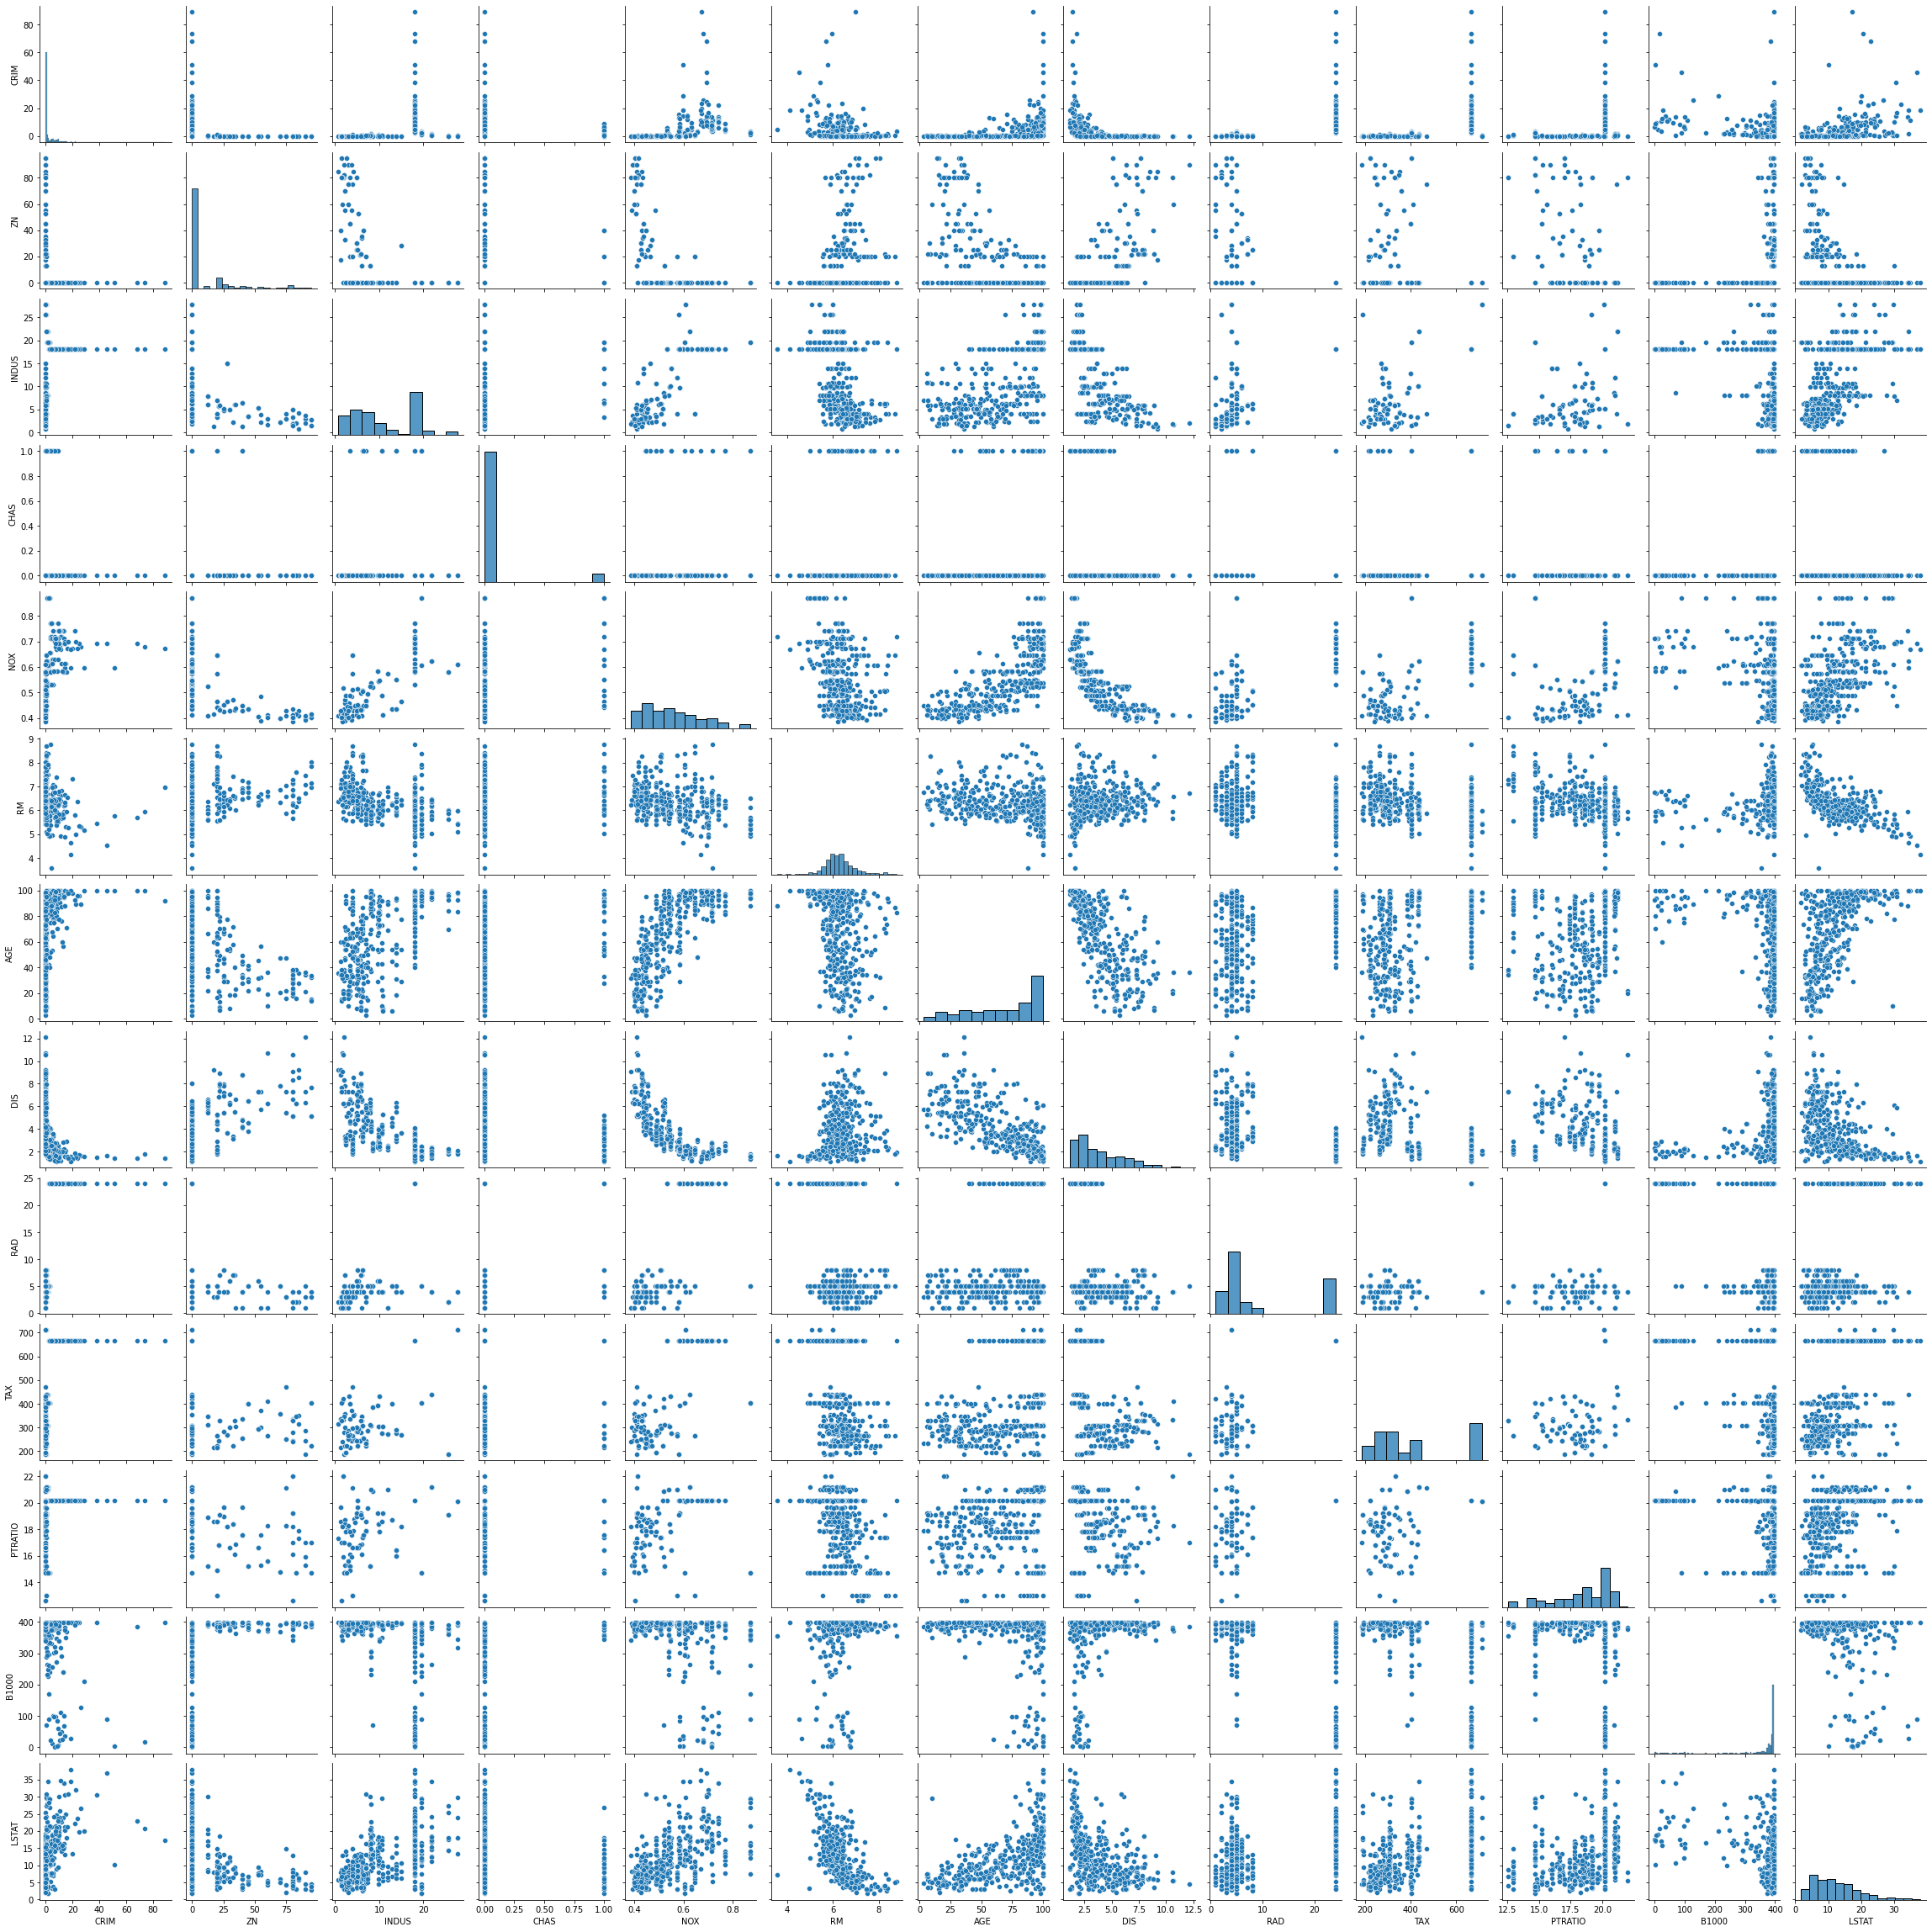

In [13]:
sns.pairplot(X_train)
plt.show()

Mirant les representacions gràfiques del conjunt X_train, podem veure que només RM (Habitacions per habitatge) té una distribució normal, lleugerament bimodal.

En quant a les relacions entre les diferents variables, només algunes presenten una lleugera relació directa (com per exemple entre DIS i NOX, o entre RM i LSTAT).

In [14]:
X_train.shape

(404, 13)

El 80% del dataset original consta de 404 files i 13 columnes.

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 261 to 172
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B1000    404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 60.4 KB


Les 13 columnes tenen valors numèrics i cap cel·la buida, d'aquestes col·lumnes, 11 tenen valors decimals i 2 valors enters.

A continuació, analitzem algunes de les dades d'aquest subset:

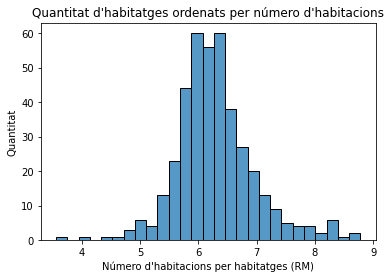

In [27]:
#Distribució de RM
sns.histplot(data=X_train, x="RM")
plt.title("Quantitat d'habitatges ordenats per número d'habitacions")
plt.ylabel('Quantitat')
plt.xlabel("Número d'habitacions per habitatges (RM)")
plt.show()
plt.show()

A primera vista, a fer l'histograma de RM (Habitacions per habitatge), sembla que té una distribució més o menys normal i bimodal. Ho averigüem fem el test de normalitat de Saphiro-Wilk:

In [25]:
#Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(X_train["RM"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.959, p=0.000
Probably not Gaussian


LLavors, al 